In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.linear_model import Ridge


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [41]:


data=load_diabetes()

In [42]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [43]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["target"])

In [44]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [45]:
df_target.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=45)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353, 1), (89, 1))

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
model.intercept_, model.coef_

(array([152.13623332]),
 array([[  23.45465406, -247.42747406,  492.1087518 ,  329.35876431,
         -970.79723039,  573.54295519,  182.42162368,  255.92168168,
          794.21609282,   89.32249214]]))

In [49]:
print("R2 Score:", r2_score(y_test, model.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

R2 Score: 0.5188113124539249
RMSE: 48.72713760953253


In [65]:
# Regularization L2 | Ridge Regression

R = Ridge(alpha=0.001)

In [66]:
R.fit(X_train,y_train)

Ridge(alpha=0.001)

In [67]:
R.intercept_, R.coef_

(array([152.12463297]),
 array([  24.01614407, -246.40604384,  493.5928598 ,  329.08832995,
        -852.76773624,  479.42466903,  131.86682689,  243.03291973,
         748.96464364,   90.15508276]))

In [68]:
print("R2 Score:", r2_score(y_test, R.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, R.predict(X_test))))

R2 Score: 0.5201448351821762
RMSE: 48.65957177859253


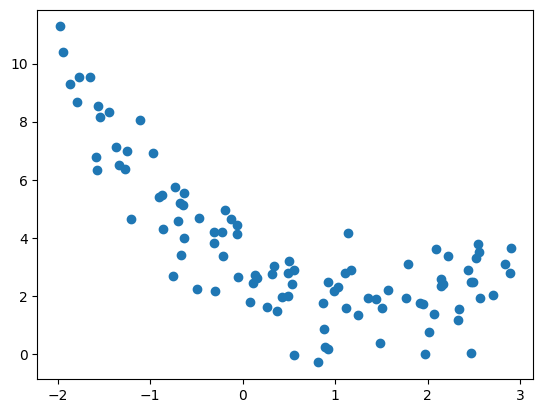

In [54]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

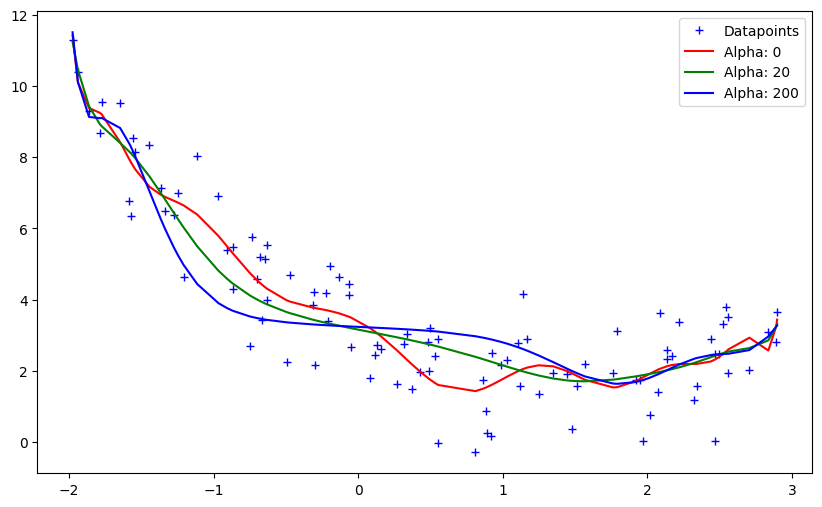

In [55]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()